# Random Forest Classifier in NPF Data

## Creating the dataset

In [1]:
import pandas as pd
import numpy as np

npf = pd.read_csv("npf_train.csv")
npf_test = pd.read_csv("npf_test_hidden.csv")

npf = npf.set_index("date")
npf = npf.drop("id", axis=1)
npf = npf.drop("partlybad", axis=1)

npf_test = npf_test.set_index("date")
npf_test = npf_test.drop("id", axis=1)
npf_test = npf_test.drop("partlybad", axis=1)

class2 = np.array(["nonevent", "event"])
npf["class2"] = class2[(npf["class4"]!="nonevent").astype(int)]
npf_test["class2"] = class2[(npf_test["class4"]!="nonevent").astype(int)]

npf

,class4,CO2168.mean,CO2168.std,CO2336.mean,CO2336.std,CO242.mean,CO242.std,CO2504.mean,CO2504.std,Glob.mean,...,T672.std,T84.mean,T84.std,UV_A.mean,UV_A.std,UV_B.mean,UV_B.std,CS.mean,CS.std,class2
date,,,,,,,,,,,,,,,,,,,,,
2000-01-17,Ib,368.771711,0.310309,368.665658,0.305127,369.371184,0.333606,368.616053,0.302364,41.650106,...,0.250952,-0.899393,0.271648,2.492491,1.310880,0.031587,0.018122,0.000243,0.000035,event
2000-02-28,nonevent,378.197295,1.001493,378.083089,1.025472,378.671311,1.017208,378.029508,1.022258,3.478842,...,0.313460,2.033191,0.271090,0.295937,0.177836,0.005140,0.003552,0.003658,0.000940,nonevent
2000-03-24,Ib,373.043158,0.749865,372.930066,0.728411,373.569735,0.835240,372.869868,0.692828,297.954063,...,2.037111,0.780422,2.334741,14.434789,8.627312,0.353743,0.272472,0.000591,0.000191,event
2000-03-30,II,375.643019,0.558629,375.549430,0.540964,376.045849,0.580730,375.506013,0.529970,324.318386,...,2.509758,6.533544,2.695277,16.077513,9.984686,0.568242,0.451830,0.002493,0.000466,event
2000-04-04,nonevent,377.661030,0.408421,377.609576,0.423963,378.117134,0.417243,377.582242,0.424460,167.479964,...,1.438071,2.133774,1.614122,9.710422,7.054069,0.339135,0.291457,0.004715,0.000679,nonevent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011-08-16,nonevent,381.016623,4.411571,381.030844,4.062115,382.901742,5.061991,381.072078,3.840630,121.227780,...,1.089563,17.268471,1.308728,8.688739,8.320799,0.464422,0.496816,0.002423,0.000425,nonevent
2011-08-19,nonevent,383.698146,8.418351,384.052632,8.130389,386.436800,9.901536,384.105592,7.952936,332.744478,...,2.868514,16.352391,3.055122,18.475262,12.838481,0.884404,0.726461,0.002476,0.000902,nonevent
2011-08-21,nonevent,379.279128,12.045785,379.363087,11.533353,381.268591,14.043508,379.163200,10.932955,114.298822,...,1.696894,15.094141,1.745526,8.099394,5.851942,0.416961,0.363890,0.003484,0.000457,nonevent


## Splitting train and test data

In [5]:
from sklearn.model_selection import train_test_split

X_train = npf.drop(["class4", "class2"], axis=1)
y_train = npf["class2"]

X_test = npf_test.drop(["class4", "class2"], axis=1)
y_test = npf_test["class2"]

## Using RandomizedSearchCV to find best hyperparameters for RandomForestClassifier

We will be tuning RandomForestClassifier parameters to achieve the highest accuracy model.
Let's choose the most common hyperparameters of RandomForestClassifier for tuning:
- n_estimators (amount of trees in the forest)
- max_depth (max depth of decision trees)
- min_samples_split (The min samples required to split an internal node)
- min_samples_leaf (min samples required to be a leaf)
- bootsrap (if full dataset is used for all trees)

We will be creating a range for all parameters and let RandomizedSearchCV and GridSearchCV pick the best parameters.
First we are going to try parameters randomly using RandomizedSearchCV:

In [6]:
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 100, num = 10)]
max_depth = [int(x) for x in np.linspace(10, 100, num = 10)]
max_depth.append(None)
min_samples_split = [4, 5, 6, 8]
min_samples_leaf = [2, 4, 6]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
random_grid

{'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'min_samples_split': [4, 5, 6, 8],
 'min_samples_leaf': [2, 4, 6],
 'bootstrap': [True, False]}

In [8]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

rf =  RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 200, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train, y_train)

print(rf_random.best_params_)

Fitting 3 folds for each of 200 candidates, totalling 600 fits
[CV] END bootstrap=False, max_depth=60, min_samples_leaf=6, min_samples_split=4, n_estimators=60; total time=   0.3s
[CV] END bootstrap=True, max_depth=40, min_samples_leaf=6, min_samples_split=8, n_estimators=90; total time=   0.3s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=90; total time=   0.3s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=4, min_samples_split=8, n_estimators=60; total time=   0.2s
[CV] END bootstrap=False, max_depth=70, min_samples_leaf=6, min_samples_split=4, n_estimators=60; total time=   0.2s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=20; total time=   0.1s
[CV] END bootstrap=True, max_depth=40, min_samples_leaf=4, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=4, min_samples_split=4, n_estimators=10; total time=   0.0s
[

[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=8, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=90, min_samples_leaf=2, min_samples_split=4, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=4, min_samples_split=8, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=40, min_samples_leaf=4, min_samples_split=6, n_estimators=60; total time=   0.2s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=90; total time=   0.3s
[CV] END bootstrap=False, max_depth=100, min_samples_leaf=4, min_samples_split=4, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=50, min_samples_leaf=2, min_samples_split=4, n_estimators=60; total time=   0.2s
[CV] END bootstrap=True, max_depth=90, min_samples_leaf=6, min_samples_split=5, n_estimators=70; total time=   0.2s
[CV] END bootstrap=False, max_depth=40, min_samples_leaf=6, min_sa

[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=8, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=2, min_samples_split=6, n_estimators=20; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=4, min_samples_split=8, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=6, min_samples_split=6, n_estimators=100; total time=   0.3s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=6, min_samples_split=5, n_estimators=20; total time=   0.1s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=4, min_samples_split=8, n_estimators=60; total time=   0.2s
[CV] END bootstrap=False, max_depth=70, min_samples_leaf=6, min_samples_split=4, n_estimators=60; total time=   0.2s
[CV] END bootstrap=True, max_depth=50, min_samples_leaf=2, min_samples_split=4, n_estimators=60; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, mi

[CV] END bootstrap=True, max_depth=90, min_samples_leaf=2, min_samples_split=4, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=40, min_samples_leaf=6, min_samples_split=8, n_estimators=90; total time=   0.3s
[CV] END bootstrap=False, max_depth=40, min_samples_leaf=4, min_samples_split=6, n_estimators=60; total time=   0.2s
[CV] END bootstrap=False, max_depth=100, min_samples_leaf=6, min_samples_split=5, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=4, min_samples_split=6, n_estimators=50; total time=   0.2s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=2, min_samples_split=4, n_estimators=60; total time=   0.2s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=20; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=40; total time=   0.1s
[CV] END bootstrap=False, max_depth=100, min_samples_leaf=4, mi

RandomSearchCV in the first run gave the minimum available features in most features:
´{'n_estimators': 100,
    'min_samples_split': 5,
    'min_samples_leaf': 4,
    'max_features': 'auto',
    'max_depth': 70,
    'bootstrap': True}´
    
so I tuned the available features down.
Most interesting features turned out to be n_estimators and max_depth. We will be narrowing down these parameters for the next step in hyperparameter optimization: Grid Search with Cross validation:

In [9]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': [100],
 'max_depth': [20, 50, 90, 100, 110, 120, 130, 150, None],
 'min_samples_split': [5, 6, 7],
 'min_samples_leaf': [5, 6, 7],
 'bootstrap': [True, False]}
rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

grid_search.fit(X_train, y_train)

print(grid_search.best_params_)

Fitting 3 folds for each of 162 candidates, totalling 486 fits
[CV] END bootstrap=False, max_depth=60, min_samples_leaf=6, min_samples_split=4, n_estimators=60; total time=   0.3s
[CV] END bootstrap=True, max_depth=40, min_samples_leaf=6, min_samples_split=8, n_estimators=90; total time=   0.3s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=90; total time=   0.3s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=6, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=4, min_samples_split=6, n_estimators=50; total time=   0.2s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=2, min_samples_split=4, n_estimators=60; total time=   0.2s
[CV] END bootstrap=True, max_depth=90, min_samples_leaf=6, min_samples_split=5, n_estimators=70; total time=   0.2s
[CV] END bootstrap=False, max_depth=100, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.4s


[CV] END bootstrap=True, max_depth=90, min_samples_leaf=2, min_samples_split=4, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=2, min_samples_split=6, n_estimators=20; total time=   0.1s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=6, min_samples_split=5, n_estimators=20; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=6, min_samples_split=6, n_estimators=100; total time=   0.3s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=6, min_samples_split=5, n_estimators=20; total time=   0.1s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=4, min_samples_split=8, n_estimators=60; total time=   0.2s
[CV] END bootstrap=False, max_depth=100, min_samples_leaf=4, min_samples_split=4, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=50, min_samples_leaf=2, min_samples_split=4, n_estimators=60; total time=   0.2s
[CV] END bootstrap=True, max_depth=90, min_samples_leaf=6, min_s

[CV] END bootstrap=False, max_depth=10, min_samples_leaf=2, min_samples_split=6, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=80, min_samples_leaf=6, min_samples_split=5, n_estimators=20; total time=   0.1s
[CV] END bootstrap=False, max_depth=100, min_samples_leaf=2, min_samples_split=4, n_estimators=90; total time=   0.3s
[CV] END bootstrap=False, max_depth=100, min_samples_leaf=2, min_samples_split=4, n_estimators=90; total time=   0.3s
[CV] END bootstrap=False, max_depth=50, min_samples_leaf=6, min_samples_split=6, n_estimators=80; total time=   0.3s
[CV] END bootstrap=False, max_depth=50, min_samples_leaf=6, min_samples_split=6, n_estimators=80; total time=   0.3s
[CV] END bootstrap=True, max_depth=60, min_samples_leaf=6, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=60, min_samples_leaf=6, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=60, min_samples_leaf=6, min_sa

[CV] END bootstrap=True, max_depth=None, min_samples_leaf=4, min_samples_split=6, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=70, min_samples_leaf=6, min_samples_split=8, n_estimators=20; total time=   0.1s
[CV] END bootstrap=True, max_depth=90, min_samples_leaf=2, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=90, min_samples_leaf=2, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=40, min_samples_leaf=6, min_samples_split=6, n_estimators=40; total time=   0.1s
[CV] END bootstrap=True, max_depth=40, min_samples_leaf=6, min_samples_split=6, n_estimators=40; total time=   0.1s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=5, min_samples_split=7, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=7, min_samp

[CV] END bootstrap=True, max_depth=40, min_samples_leaf=6, min_samples_split=6, n_estimators=40; total time=   0.1s
[CV] END bootstrap=False, max_depth=60, min_samples_leaf=2, min_samples_split=8, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=5, min_samples_split=6, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=6, min_samples_split=6, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=7, min_samples_split=6, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=50, min_samples_leaf=5, min_samples_split=6, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=50, min_samples_leaf=6, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=50, min_samples_leaf=7, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=90, min_samples_leaf=5, min_sa


[CV] END bootstrap=True, max_depth=20, min_samples_leaf=7, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=7, min_samples_split=7, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=50, min_samples_leaf=6, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=50, min_samples_leaf=6, min_samples_split=7, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=50, min_samples_leaf=7, min_samples_split=7, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=90, min_samples_leaf=5, min_samples_split=6, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=90, min_samples_leaf=6, min_samples_split=6, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=90, min_samples_leaf=7, min_samples_split=6, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=100, min_samples_leaf=5, min

From GridSearchCV we get about:

´{'bootstrap': True,
    'max_depth': None,
    'max_features': 'auto',
    'min_samples_leaf': 6,
    'min_samples_split': 8,
    'n_estimators': 100}´
    
Reading the documentation about RandomForestClassifier, we can see that many of these values are close to the default ones:

´{'bootstrap': True (default),
    'max_depth': None (default),
    'max_features': 'sqrt' (default),
    'min_samples_leaf': 6,
    'min_samples_split': 8,
    'n_estimators': 100 (default)}´
    
From this we can say that RandomForestClassifier is a very good model with even the default parameters.

Let's test if there is any difference to a default model:

In [11]:
rf_default = RandomForestClassifier()
rf_modified = RandomForestClassifier(min_samples_leaf=6, min_samples_split=8)

rf_default.fit(X_train, y_train)
rf_modified.fit(X_train, y_train)

print("default", rf_default.score(X_test, y_test))
print("modified", rf_modified.score(X_test, y_test))

default 1.0
modified 0.4466321243523316


Now we can say that the difference is close to nothing compared to the default model. From now on we can just use the default model.

## Trying feature selection

In order to simplify our model we can cut down the amount of datapoint we use.

Let's try two methods for feature selection SelectKBest and SelectFromModel.
SelectKBest selects the k-best amount of features from our model, whereas SelectFromModel selects the best amount of features for us automatically (which is around 25-30 features).

Let's use SelectFromModel.

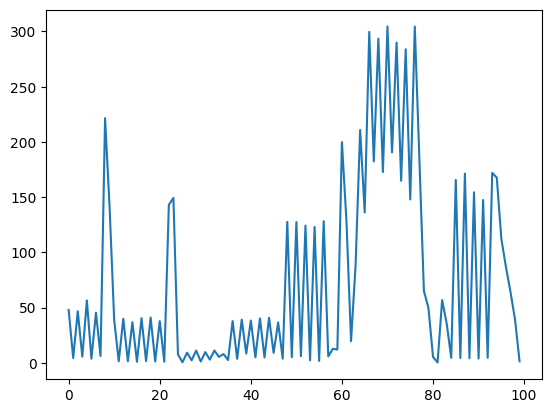

304.5287057946586
100


,CO2168.mean,CO2168.std,CO2336.mean,CO2336.std,CO242.mean,CO242.std,CO2504.mean,CO2504.std,Glob.mean,Glob.std,...,T672.mean,T672.std,T84.mean,T84.std,UV_A.mean,UV_A.std,UV_B.mean,UV_B.std,CS.mean,CS.std
date,,,,,,,,,,,,,,,,,,,,,
2000-01-17,368.771711,0.310309,368.665658,0.305127,369.371184,0.333606,368.616053,0.302364,41.650106,29.942679,...,-1.476016,0.250952,-0.899393,0.271648,2.492491,1.310880,0.031587,0.018122,0.000243,0.000035
2000-02-28,378.197295,1.001493,378.083089,1.025472,378.671311,1.017208,378.029508,1.022258,3.478842,2.165706,...,1.479493,0.313460,2.033191,0.271090,0.295937,0.177836,0.005140,0.003552,0.003658,0.000940
2000-03-24,373.043158,0.749865,372.930066,0.728411,373.569735,0.835240,372.869868,0.692828,297.954063,188.348344,...,-0.270844,2.037111,0.780422,2.334741,14.434789,8.627312,0.353743,0.272472,0.000591,0.000191
2000-03-30,375.643019,0.558629,375.549430,0.540964,376.045849,0.580730,375.506013,0.529970,324.318386,193.207278,...,5.622308,2.509758,6.533544,2.695277,16.077513,9.984686,0.568242,0.451830,0.002493,0.000466
2000-04-04,377.661030,0.408421,377.609576,0.423963,378.117134,0.417243,377.582242,0.424460,167.479964,135.294894,...,1.140121,1.438071,2.133774,1.614122,9.710422,7.054069,0.339135,0.291457,0.004715,0.000679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011-08-16,381.016623,4.411571,381.030844,4.062115,382.901742,5.061991,381.072078,3.840630,121.227780,131.474300,...,16.319361,1.089563,17.268471,1.308728,8.688739,8.320799,0.464422,0.496816,0.002423,0.000425
2011-08-19,383.698146,8.418351,384.052632,8.130389,386.436800,9.901536,384.105592,7.952936,332.744478,243.722645,...,15.820245,2.868514,16.352391,3.055122,18.475262,12.838481,0.884404,0.726461,0.002476,0.000902
2011-08-21,379.279128,12.045785,379.363087,11.533353,381.268591,14.043508,379.163200,10.932955,114.298822,99.583613,...,14.421092,1.696894,15.094141,1.745526,8.099394,5.851942,0.416961,0.363890,0.003484,0.000457


In [13]:
from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pyplot as plt

selector = SelectKBest(f_classif, k="all")
selector.fit_transform(X_train, y_train)
kbestscore = selector.scores_

h=plt.plot(kbestscore)
plt.show()

print(max(kbestscore))

cols = selector.get_support(indices=True)
print(len(cols))
X_new = X_train.iloc[:,cols]
X_new

In [14]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

m = SelectFromModel(RandomForestClassifier(), max_features=100)
m.fit(X_train, y_train)

columns = m.get_support(indices=True)
X_newtrain = X_train.iloc[:,columns]
X_newtest = X_test.iloc[:,columns]

X_newtrain

,CO2504.std,Glob.mean,H2O168.mean,H2O336.mean,H2O42.mean,H2O504.mean,H2O672.mean,H2O84.mean,NET.mean,NET.std,...,RHIRGA672.mean,RHIRGA84.mean,RHIRGA84.std,SWS.mean,T168.mean,T504.mean,T672.mean,UV_A.mean,CS.mean,CS.std
date,,,,,,,,,,,,,,,,,,,,,
2000-01-17,0.302364,41.650106,4.383158,4.358684,4.448289,4.351579,4.349342,4.422000,-18.904776,23.997837,...,76.355395,74.509200,3.153985,937.880000,-0.996623,-1.139868,-1.476016,2.492491,0.000243,0.000035
2000-02-28,1.022258,3.478842,7.233852,7.172114,7.251721,7.166230,7.121724,7.219590,16.909002,11.837190,...,101.839224,99.240574,0.816601,936.000000,1.911915,1.789722,1.479493,0.295937,0.003658,0.000940
2000-03-24,0.692828,297.954063,3.575000,3.553026,3.621523,3.540331,3.539536,3.592039,146.523400,150.941475,...,59.608742,56.476316,14.347865,923.745098,0.541530,0.110739,-0.270844,14.434789,0.000591,0.000191
2000-03-30,0.529970,324.318386,6.500566,6.512278,6.515472,6.512152,6.519430,6.512642,191.957743,156.370048,...,71.324747,67.095220,8.855484,925.622642,6.339887,5.982673,5.622308,16.077513,0.002493,0.000466
2000-04-04,0.424460,167.479964,6.223576,6.213879,6.269451,6.218667,6.223394,6.240667,120.876883,128.783783,...,92.905455,86.864424,8.428027,921.727273,1.885328,1.535061,1.140121,9.710422,0.004715,0.000679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011-08-16,3.840630,121.227780,15.121299,15.068442,15.224194,15.026299,14.995519,15.189351,112.010483,116.719178,...,80.831494,77.203052,5.952540,915.250000,17.075372,16.608408,16.319361,8.688739,0.002423,0.000425
2011-08-19,7.952936,332.744478,10.946556,10.760329,11.328859,10.641908,10.550927,11.183046,233.307016,222.197400,...,60.453642,62.037815,16.718655,890.500000,16.469414,16.113789,15.820245,18.475262,0.002476,0.000902
2011-08-21,10.932955,114.298822,13.131946,13.056040,13.218322,13.013600,12.995638,13.185101,78.339978,89.941820,...,79.196711,76.968926,5.911362,879.032258,14.991524,14.667092,14.421092,8.099394,0.003484,0.000457


We can test now test the effectivity of this modified dataset by training one model with the default one and the other with the modified one:

In [ ]:
rf_default = RandomForestClassifier()
rf_modified = RandomForestClassifier()

rf_default.fit(X_train, y_train)
rf_modified.fit(X_newtrain, y_train)

print("default", rf_default.score(X_test, y_test))
print("modified", rf_modified.score(X_newtest, y_test))

From this we can tell that our modified model is more effective, with better score and less flexibility.

In [ ]:
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier()
rf.fit(X_newtrain, y_train)

y_pred_test = rf.predict(X_newtest)
print(accuracy_score(y_test, y_pred_test))

print("Accuracy on train data:", rf.score(X_newtrain, y_train))
print("Accuracy on test data:", rf.score(X_newtest, y_test))

## Conclusion week 1

With testing the most influential hyperparameters we can say that none of them really made a big difference. RandomForestClassifier is very effective even with it's default parameters. From modifying the dataset, we can see that it was influential and should be done, since it also makes our model a lot less complicated and easier to iterate with. Accuracy in the training data is 100% and on the test data it is around 44-45%.

Sources:
- [RandomForestClassifier - SKLearn](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
- [Hyperparameter Tuning the Random Forest in Python - Towards Data Science](https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74)
- [SelectFromModel - SKLearn](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFromModel.html)
- [SelectKBest - SKLearn](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html)